# Project 3 - Subreddit Classifier

## Problem Statement


Reddit receives numerous posts on a daily basis and it is crucial that Reddit successfully identifies the correct category of those posts. This increases user engagement as it allows more users to share their knowledge. While there may be people who can categorize these post into their relevant subreddits, it may be increasingly challenging to do so manually with more and more posts. 

In this project, we will be developing classification models that can distinguish which of two subreddits,([r/nosleep](https://www.reddit.com/r/nosleep/) or [r/AsianBeauty](https://www.reddit.com/r/AsianBeauty/)) the post belongs to as accurately as possible. We will compare two classification models- (i) Logistic Regression and (ii) Multinomial Naive Bayes. We will evaluate the model using accuracy score, as well as looking at the recall and precision of the model.

All libraries will be imported here

In [1]:
import requests
import time
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer , HashingVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction import stop_words
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


## Data Cleaning & EDA

In [2]:
# To read in nosleep and asianbeauty csv and check the size
nosleep_data = pd.read_csv('reddit_nosleep.csv', index_col='Unnamed: 0')
asianbeauty_data = pd.read_csv('reddit_AsianBeauty.csv',  index_col='Unnamed: 0')
print(nosleep_data.shape)
print(asianbeauty_data.shape)
nosleep_data.head()

(981, 4)
(992, 4)


,subreddit,title,content,name
0,nosleep,May Contest Voting Thread,NaN,t3_c80r26
1,nosleep,"I used FaceApp, which shows what you'll look l...","""FaceApp"" is an app that shows you what you'll...",t3_cexl0n
2,nosleep,I pre-write emergency alerts. I think we’re ab...,"You might not realize this, but a lot of the a...",t3_cexfgx
3,nosleep,The Depression Project [Part 2],[Part 1](https://www.reddit.com/r/nosleep/com...,t3_ceumfu
4,nosleep,I'm On Fire,"""Hey little girl is your daddy home?\n\nDid he...",t3_ceykrh


In [3]:
# To check for duplicated data
nosleep_data[nosleep_data.duplicated()]

,subreddit,title,content,name
780,nosleep,May Contest Voting Thread,NaN,t3_c80r26
781,nosleep,"I used FaceApp, which shows what you'll look l...","""FaceApp"" is an app that shows you what you'll...",t3_cexl0n
782,nosleep,I pre-write emergency alerts. I think we’re ab...,"You might not realize this, but a lot of the a...",t3_cexfgx
783,nosleep,The Depression Project [Part 2],[Part 1](https://www.reddit.com/r/nosleep/com...,t3_ceumfu
784,nosleep,I'm On Fire,"""Hey little girl is your daddy home?\n\nDid he...",t3_ceykrh
785,nosleep,A child without eyes waved to me from another ...,\nI still don’t know to this day what made me ...,t3_cews6u
786,nosleep,My new dog is such a good boy,I don't like to think about why I moved back t...,t3_cf5rg0
787,nosleep,A strange call from a lost girl.,\n\nI finally found out how beautiful she act...,t3_cf1nfa
788,nosleep,I only eat fish,I stopped eating red meat after my brother dro...,t3_cezy9p
789,nosleep,"After what had happened, I am never going to h...",A great thing about house-sitting is that I ca...,t3_cf3vn2


In [4]:
# To check for duplicated data
asianbeauty_data[asianbeauty_data.duplicated()]

,subreddit,title,content,name
690,AsianBeauty,HAVE A QUESTION? ASK HERE! Daily Help and Ques...,Hello and welcome to the Daily Help Thread! Th...,t3_cf3cur
691,AsianBeauty,Weekly Random Chat,It’s the Weekly Random Chat Post! This is the...,t3_cf2t2m
692,AsianBeauty,[Discussion] Do you remember to reapply sunscr...,"If so, what's your secret to remembering to do...",t3_cf5ety
693,AsianBeauty,[Discussion] Do pimple patches work for you?,What are your do’s and don’ts? Are all brands ...,t3_cf070z
694,AsianBeauty,[FOTD] Just two months of Asian Beauty and my ...,NaN,t3_celvo3
695,AsianBeauty,[Discussion] Favorite toothpastes?,What are your favorite Asian toothpastes that ...,t3_cf3us1
696,AsianBeauty,[PSA] [Research] Why Most Ceramide Products ar...,NaN,t3_cer0yc
697,AsianBeauty,[Review] A’pieu Water Light Tint in CR02,NaN,t3_cf2568
698,AsianBeauty,"[Journal] A bout of cystic acne, and how daily...","While I was on birth control, nothing, and I r...",t3_cev1s8
699,AsianBeauty,"Daily Deals, Fluff, and Hauls","Post all of your deals, memes, gifs, hauls, sh...",t3_cf3l8d


In [5]:
# To drop duplicates
asianbeauty_data.drop_duplicates(keep='first', inplace=True)
nosleep_data.drop_duplicates(keep='first', inplace=True)

In [6]:
# To concat the 2 datasets together
total = pd.concat([nosleep_data, asianbeauty_data], sort=False)
print(total.shape)
total.head()

(1470, 4)


,subreddit,title,content,name
0,nosleep,May Contest Voting Thread,NaN,t3_c80r26
1,nosleep,"I used FaceApp, which shows what you'll look l...","""FaceApp"" is an app that shows you what you'll...",t3_cexl0n
2,nosleep,I pre-write emergency alerts. I think we’re ab...,"You might not realize this, but a lot of the a...",t3_cexfgx
3,nosleep,The Depression Project [Part 2],[Part 1](https://www.reddit.com/r/nosleep/com...,t3_ceumfu
4,nosleep,I'm On Fire,"""Hey little girl is your daddy home?\n\nDid he...",t3_ceykrh


In [7]:
# To check for null values
total.isnull().sum()

subreddit      0
title          0
content      177
name           0
dtype: int64

In [8]:
#Replacing null with 'null'
total['content'].fillna('null9999', inplace=True) 


In [9]:
# To create a flag that tags nosleep post
total['nosleep'] = total['subreddit'].replace({'nosleep':1, 'AsianBeauty':0})
total.head()

,subreddit,title,content,name,nosleep
0,nosleep,May Contest Voting Thread,null9999,t3_c80r26,1
1,nosleep,"I used FaceApp, which shows what you'll look l...","""FaceApp"" is an app that shows you what you'll...",t3_cexl0n,1
2,nosleep,I pre-write emergency alerts. I think we’re ab...,"You might not realize this, but a lot of the a...",t3_cexfgx,1
3,nosleep,The Depression Project [Part 2],[Part 1](https://www.reddit.com/r/nosleep/com...,t3_ceumfu,1
4,nosleep,I'm On Fire,"""Hey little girl is your daddy home?\n\nDid he...",t3_ceykrh,1


In [10]:
# Checking distribution of target - nosleep (establishing the baseline)
print("Final shape is: ", total.shape)
display("Target count: ", total['nosleep'].value_counts())
display("Target percentage: ",total['nosleep'].value_counts(normalize=True))


Final shape is:  (1470, 5)


'Target count: '

1    780
0    690
Name: nosleep, dtype: int64

'Target percentage: '

1    0.530612
0    0.469388
Name: nosleep, dtype: float64

Frequency of the classes are roughly the same, so there is not need to stratify the train test split later,

#### Word Cloud to look at the top 100 words in each subreddit

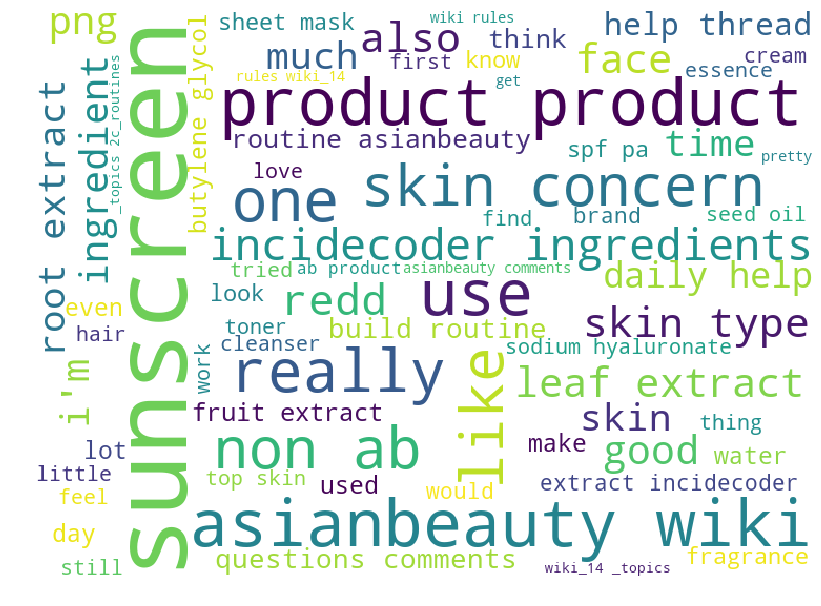

In [11]:
text = ' '

# Initializing stop words
# nltk.download('stopwords')
my_stopwords = stopwords.words("english")

# Adding words that are in the features that are no actual words
my_stopwords.extend(['gt', 'amp','x200b', '\n', 'https', 'reddit', 'www', 'com'])  

# iterate through content 
for x in asianbeauty_data['content']: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=my_stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
# plt.savefig('../images/reddit_wordcloud.png')
plt.show()

We can see that for the content of AsianBeauty subrredit, the words that appear a higher number of times are:

- discussion
- ask daily
- product
- review
- daily help

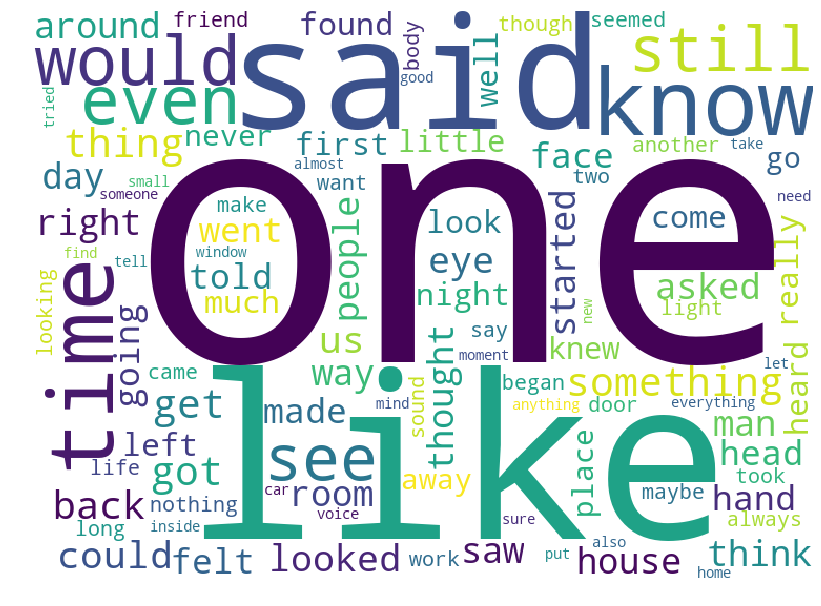

In [12]:
text = ' '
# iterate through content 
for y in nosleep_data['content']: 
      
    # typecaste each val to string 
    y = str(y) 
  
    # split the value 
    values = y.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc1 = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=my_stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc1) 
plt.axis("off")
# plt.savefig('../images/reddit_wordcloud.png')
plt.show()

We can see that for the content of nosleep subrredit, the words that appear a higher number of times are:

- said
- one
- know
- like

It appears that these words that appear most frequently in the content of nosleep are quite common and not very indicative of the subreddit it came from unlike AsianBeauty.

## Preprocessing and Modelling

In [13]:
# Feature and target
X = total['content']
y = total['nosleep']

#### Lemmatization using Spacy

In [14]:
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatize(text):
    doc = nlp(text)
    
    lem_text = " ".join([token.lemma_ for token in doc])
    lem_text = lem_text.replace('-PRON-', "")
    
    return lem_text
X = X.apply(lemmatize)

#### Train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [16]:
print(X_train.shape)
print(y_train.shape)

(1176,)
(1176,)


#### Stopwords

In [17]:
# Initializing stop words
# nltk.download('stopwords')
my_stopwords = stopwords.words("english")

# Adding words that are in the features that are no actual words
my_stopwords.extend(['gt', 'amp','x200b', '\n'])

In this binary classification problem, other than evaluating the accuracy score, another way of measuring how well the model performs is using the confusion matrix which displays how many true positive, true negative, false postive and false negative the model generates.

In the content of this model, 

- True positive is a post that is predicted to come from no sleep subreddit and indeed comes from no sleep.
- True negative is a post that is predicted to come from Asian Beauty subreddit and indeed comes from Asian Beauty.
- False positive is a post that is predicted to come from no sleep but actaully comes from Asian Beauty.
- False negative is a post that is predicted to come from Asian Beauty but actually comes from no sleep.


In [18]:
name = []
score = []

# Defining a model that prints the score, parameters, recall, precision, conf matrix of the best gridsearch model
def model_eval(params, model):
    grid_search = GridSearchCV(pipe, params, cv = 5, verbose = 1, n_jobs = 4)
    grid_search.fit(X_train, y_train)

    # Printing the best score/parameters from the grid search
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best paramters: {}'.format(grid_search.best_params_))

    # Best model from grid search
    grid_model = grid_search.best_estimator_
    print('Model score on x_train: {}'.format(grid_model.score(X_train, y_train)))

    # Prediction and score
    prediction = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, prediction)))

    # Confusion Matrix
    conf_matrix_grid = confusion_matrix(y_test, prediction)

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    print('Precison of the best model is {}'.format(tp/(tp+fp)))
    print('Recall of the best model is {}'.format(tp/(tp+fn)))
    
    name.append(model)
    score.append(accuracy_score(y_test, prediction))
    
    display(pd.DataFrame(conf_matrix_grid, columns=['Pred Asian Beauty', 'Pred No Sleep'], index=['Actual Asian Beauty','Actual No Sleep']))


#### Using count vectorizer and multinomial naive bayes

In [19]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=my_stopwords)),
    ('nb', MultinomialNB())
])

grid_params = {    
    'cvec__max_df': (0.5, 0.75),
    'cvec__min_df': (5,10),
    'cvec__max_features': [800,1200,1500],
    'cvec__ngram_range': ((1, 1), (1, 2), (1,3)),

}

model_eval(grid_params, 'cvec,nb')
print(name, score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   54.1s
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  8.1min finished


Best score: 0.9795918367346939
Best paramters: {'cvec__max_df': 0.5, 'cvec__max_features': 1500, 'cvec__min_df': 10, 'cvec__ngram_range': (1, 1)}
Model score on x_train: 0.9829931972789115
Accuracy score of prediction: 0.9829931972789115
Precison of the best model is 0.9683544303797469
Recall of the best model is 1.0


,Pred Asian Beauty,Pred No Sleep
Actual Asian Beauty,136,5
Actual No Sleep,0,153


['cvec,nb'] [0.9829931972789115]


#### Using Tf-idf vectorizer and multinomial naive bayes

In [20]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=my_stopwords)),
    ('nb', MultinomialNB())
])

grid_params = {
    'tvec__max_df': (0.5, 0.75),
    'tvec__min_df': (5,10),
    'tvec__max_features': [800,1200,1500],
    'tvec__ngram_range': ((1, 1), (1, 2), (1,3)),

}
model_eval(grid_params, 'tvec,nb')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  3.5min finished


Best score: 0.9880952380952381
Best paramters: {'tvec__max_df': 0.5, 'tvec__max_features': 1500, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 1)}
Model score on x_train: 0.9906462585034014
Accuracy score of prediction: 0.9897959183673469
Precison of the best model is 0.9807692307692307
Recall of the best model is 1.0


,Pred Asian Beauty,Pred No Sleep
Actual Asian Beauty,138,3
Actual No Sleep,0,153


#### Using count vectorizer and Logistic Regression

In [21]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=my_stopwords)),
    ('lr', LogisticRegression()),
])

grid_params = {
    'cvec__max_df': (0.5, 0.75),
    'cvec__min_df': (5, 10),
    'cvec__max_features': [800,1200,1500],
    'cvec__ngram_range': ((1, 1), (1, 2), (1,3)),
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-2,2,7)

}
model_eval(grid_params, 'cvec,lr')

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.9s
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 14.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 20.9min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 30.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 41.2min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 55.3min
[Parallel(n_jobs=4)]: Done 2520 out of 2520 | elapsed: 57.9min finished
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

Best score: 0.9982993197278912
Best paramters: {'cvec__max_df': 0.5, 'cvec__max_features': 800, 'cvec__min_df': 5, 'cvec__ngram_range': (1, 1), 'lr__C': 0.01, 'lr__penalty': 'l2'}
Model score on x_train: 0.9982993197278912
Accuracy score of prediction: 1.0
Precison of the best model is 1.0
Recall of the best model is 1.0


,Pred Asian Beauty,Pred No Sleep
Actual Asian Beauty,141,0
Actual No Sleep,0,153


#### Using Tf-idf vectorizer and Logistic Regression

In [22]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=my_stopwords)),
    ('lr', LogisticRegression()),
])

grid_params = {
    'tvec__max_df': (0.5, 0.75),
    'tvec__min_df': (5,10),
    'tvec__max_features': [800,1200,1500],
    'tvec__ngram_range': ((1, 1), (1, 2), (1,3)),
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-2,2,7)

}
model_eval(grid_params, 'tvec,lr') 

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.8min
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 17.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 27.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 38.9min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 52.9min
[Parallel(n_jobs=4)]: Done 2520 out of 2520 | elapsed: 54.6min finished
/Users/suying/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

Best score: 0.9982993197278912
Best paramters: {'lr__C': 0.21544346900318834, 'lr__penalty': 'l2', 'tvec__max_df': 0.5, 'tvec__max_features': 800, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 1)}
Model score on x_train: 0.9982993197278912
Accuracy score of prediction: 0.9965986394557823
Precison of the best model is 0.9935064935064936
Recall of the best model is 1.0


,Pred Asian Beauty,Pred No Sleep
Actual Asian Beauty,140,1
Actual No Sleep,0,153


In [23]:
# Placing all scores in a dataframe - scoring
scoring = pd.DataFrame({'model': name, 'scores': score})
scoring

,model,scores
0,"cvec,nb",0.982993
1,"tvec,nb",0.989796
2,"cvec,lr",1.000000
3,"tvec,lr",0.996599


From the scores, we can see that using Count Vectorizer and Linear Regression gives us the best model. It has the highest accuracy scores. The hyperparamters of this models we found using gridsearch are {'cvec__max_df': 0.5, 'cvec__max_features': 800, 'cvec__min_df': 5, 'cvec__ngram_range': (1, 1), 'lr__C': 0.01, 'lr__penalty': 'l2'}

Using these hyperparameters, we will fit the model and subsequently predict the classification of the posts and plot the ROC curve.

In [24]:
# Fit the best model found again 
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=my_stopwords, max_df=0.5, max_features=800, min_df=5, ngram_range=(1,1))),
    ('lr', LogisticRegression(penalty='l2', C=0.01)),
])

model = pipe.fit(X_train, y_train)

In [25]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in model.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

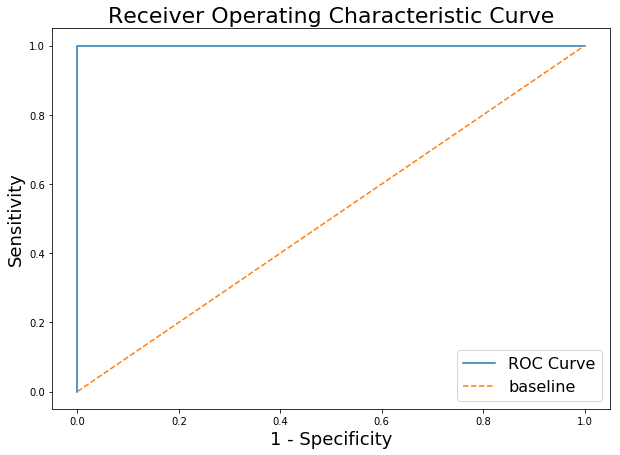

In [26]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Findings
In this scenario, false negative and false positive are equally bad as they mean misclassification of the post. So, we would choose the best model based on the highest accuracy score. Using GridSearch, the vectorizer and estimator with the best accuracy score (score:1.0) is CountVectorizer with Logistic Regression. 

## Future work

To consider classifying posts from other subreddits that are slightly more similiar in nature so see if the model really works as well.
